![title](https://i.imgur.com/4MEoMNd.png)

![image](https://imgs.xkcd.com/comics/newton_and_leibniz.png)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
%%html
<style>.bs-callout{padding:20px;margin:20px 0;border:1px solid #eee;border-left-width:5px;border-radius:3px}.bs-callout h4{margin-top:0;margin-bottom:5px}.bs-callout p:last-child{margin-bottom:0}.bs-callout code{border-radius:3px}.bs-callout+.bs-callout{margin-top:-5px}.bs-callout-default{border-left-color:#777}.bs-callout-default h4{color:#777}.bs-callout-primary{border-left-color:#428bca; background-color:#e1ecff }.bs-callout-primary h4{color:#428bca}.bs-callout-success{border-left-color:#5cb85c; background-color: #e1ffe5 }.bs-callout-success h4{color:#5cb85c}.bs-callout-danger{border-left-color:#d9534f; background-color: #ffe1e1 }.bs-callout-danger h4{color:#d9534f}.bs-callout-warning{border-left-color:#f0ad4e}.bs-callout-warning h4{color:#f0ad4e}.bs-callout-info{border-left-color:#5bc0de}.bs-callout-info h4{color:#5bc0de}</style>

# Differentiation, ODEs, and first order initial value problems

Differential equations describe a wide variety of physical phenomena, however
not all systems of differential equations can be solved analytically. Thus,
numeric approximations fill an important void, providing us with methods
to model and analyse physical systems when analytic tools fall short.

In this notebook, we will provide a brief introduction to numerical methods
of solving first order ordinary differential equations (ODEs) using finite-
difference methods.

# Maths behind the programming: The Method of Finite Differences

## First order forwards difference

Consider the derivative of a function $f(x)$, defined by 

\begin{align}
f'(x)=\lim_{h\rightarrow0}\frac{f(x+h)-f(x)}{h}
\end{align}

How can we compute this using a computer? Assuming we keep $h$ small (i.e. $h\ll1$), we might reason that a fairly reasonable approximation might be

$$\begin{align}f'(x)\approx \frac{f(x+h)-f(x)}{h}\end{align}$$

This is known as the **finite difference approximation**, with $h$ referred to as the **step size**.

Let's consider a quick example.

---
<div class="alert alert-block alert-warning">

**Example:**
<br>
Numerically calculate the derivative of $f(x) = e^x \sin(x^2)$ at $x = 3$.
</div>

**Solution:** Using the finite difference approximation,

$$f'(x)\approx \frac{f(x+h)-f(x)}{h}=\frac{e^{x+h}\sin[(x+h)^2]-e^x\sin(x^2)}{h}$$

Choosing $h=0.001$ (such that $h\ll 1$), we find that:

$$f'(3)\approx =\frac{e^{3.001}\sin(3.001^2)-e^3\sin(3^2)}{0.001}$$

We can evaluate this using Python and NumPy:

In [6]:
h = 0.001

def f(x):
    return np.exp(x)*np.sin(x**2)

(f(3+h)-f(3))/h

-101.79819458746309

<div class="alert alert-block alert-info">
**Problem 1:**
<br>
Find the derivative analytically, and compare the result to the answer we got above. What is the absolute error in our approximation? What is the percentage error?
</div>

### Why is it called the first order forwards difference?

But can we do better, and actually quantify the error in the finite-difference approximation? Let's consider the Taylor series expansion of $f(x+h)$. Recall that the Taylor series is defined by

\begin{align}
	f(x) = \sum_{n=0}^\infty \frac{1}{n!}(x-x_0)^n f^{(n)}(x_0)
\end{align}

Now, expanding $f(x+h)$ as a Taylor series of variable $h$, around initial point $x_0=x$,

\begin{align}
	f(x+h) &= \sum_{n=0}^\infty \frac{1}{n!}(x+h-x)^n f^{(n)}(x) = \sum_{n=0}^\infty \frac{1}{n!}h^n f^{(n)}(x)
\end{align}

and writing out the first few terms,

\begin{align}
	f(x+h) = f(x) + h f'(x) + \frac{1}{2}h^{2}f''(x) + \frac{1}{6}h^3 f'''(x)+\mathcal{O}(h^4)
\end{align}

<br>
<div class="alert alert-block alert-success">
**Note:**
<br>
the term $\mathcal{O}(h^4)$ indicates that we are neglecting terms of order $h^4$ or smaller.
</div>

Solving this equation for $f'(x)$, we recover the finite-difference equation, now with additional higher order terms:

\begin{align}
	f'(x) = \frac{f(x+h)-f(x)}{h}-\frac{1}{2}hf''(x) - \frac{1}{6}h^2 f'''(x)+ \cdots
\end{align}

or, using big O notation,

\begin{align}
	\boxed{f'(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h)}
\end{align}

This tells us that this is a **first-order** finite-difference approximation -- the error is proportional to our step size, $h$, and scales linearly.


<br>
<div class="alert alert-block alert-success">
**Note:**
<br>
This error is known as **truncation** or **rounding error**. 
</div>

## Backwards difference

We just covered the forwards difference formula, so-called because it depends on the terms $f(x)$ and $f(x+h)$ -- i.e. we require the function value at the point we are interested in calculating $f'(x)$ as well as the function value at some small step \textit{forwards}.

By expanding $f(x-h)$, we can also define an analogous **backwards difference** formula:

\begin{align}
	f'(x) = \frac{f(x)-f(x-h)}{h} + \frac{1}{2} h f''(x)-\frac{1}{6} h^2 f'''(x) + \cdots
\end{align}

or in big O notation,

\begin{align}
	\boxed{f'(x)=\frac{f(x)-f(x-h)}{h} + \mathcal{O}(h)}
\end{align}

Like the forwards difference method, this is still a first order method, however it now depends on the current function value and a 'previous' function value.

## Central differences

If you look at the forward and backwards finite difference formulas, you may notice that they contain $-hf''(x)/2$ and $+hf''(x)/2$ terms respectively. Thus, adding these two expressions together, we get:

\begin{align}
	2f'(x) = &\frac{f(x+h)-f(x)}{h} -\frac{1}{2}hf''(x)-\frac{1}{6}h^2f'''(x)+ \frac{f(x)-f(x-h)}{h}  +\frac{1}{2}hf''(x) -\frac{1}{6}h^2 f'''(x)+ \cdots
\end{align}

Cancelling out and simplifying terms,

\begin{align}
	f'(x) = \frac{f(x+h)-f(x-h)}{2h} - \frac{1}{6}h^2 f'''(x) +\cdots 
\end{align}

we arrive at the so-called \textbf{central difference} formula:

\begin{align}
	\boxed{f'(x) = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{O}(h^2)}
\end{align}

Unlike the forward and backwards methods, this is a **second-order** finite difference approximation -- the numerical error will scale as a function of the *square* of the step size, resulting in a closer approximation than the forward or backwards methods for the same step size.

<br>
<div class="alert alert-block alert-info">
**Problem 2:**
<br>
Numerically calculate the derivative of $f(x) = e^x \sin(x^2)$ at $x = 3$ using the method of central finite differences.
<br>
Calculate the percentage error compared to the exact solution at $f'(3)$. How does the error compare to when we used the method of forward differences?
</div>

# The forward Euler method

Approximating derivatives is one thing, but what if we want to solve the initial value problem 

\begin{align}
	\frac{dy}{dx} = f(y(x),x), ~~ y(x_0) = y_0
\end{align}

How can we solve this ODE numerically? To start with, let's try applying the forward difference approximation to the left-hand side of the differential equation:

\begin{align}
	\frac{y(x+h)-y(x)}{h} \approx f(y(x),x)~~~\Rightarrow~~~y(x+h) \approx y(x) + h f(y(x),x)
\end{align}

That is, we can approximate the value of $y(x+h)$ simply from the current value $y(x)$ -- this is known as the **forward Euler method**.

## From maths to programming - discretisation

But the above quantities ($y(x)$, $x$) are *continuous* variables -- how does this translate to a computer program?

In order to do that, we need to **discretise** our system.

To begin with, we choose a suitable step-size $h=\Delta x$; small enough to reduce truncation error from the finite difference approximation, but not too small that precision/rounding errors are significant, and discretise the $x$-coordinate to produce a **discrete $x$ grid**:

![image](https://i.imgur.com/SmA4DaD.png)

That is, we have chosen $N$ discrete values of $x$, with $x_0\leq x\leq x_{N-1}$, each separated by step size $\Delta x$:
$$x_{n+1}-x_n=\Delta x$$

<br>
<div class="alert alert-block alert-success">
**Note:**
<br>
Conveniently, since we have chosen a constant and unchanging step-size, we can write
<br><br>
\begin{align}
x_n=x_0+n\Delta x
\end{align}
<br>
Since we know that for the final point in the grid, $x_{N-1}=x_0+(N-1)\Delta x$, we can rearrange to get an expression for $N$ in terms of $\Delta x$:
<br><br>
\begin{align}N=\frac{x_{N-1}-x_0}{\Delta x}+1\end{align}
</div>

We can now use the $x$-grid to discretise the function values itself, $y$:

\begin{align*}
	y_0 &= y(x_0)\\
	y_1 &= y(x_1)\\
	&~~\vdots\\
	y_{N-1} &= y(x_{N-1})
\end{align*}

Thus, in terms of our new discretised variables $x_n$ and $y_n$, and step size 
$\Delta x$, the Euler method can be written

\begin{align}
	\boxed{y_{n+1} \approx y_n + \Delta x f(y_n,x_n)}
\end{align}

---
**Aside:** NumPy makes it really easy to generate discrete grids, using the `np.arrange()` function.

For example, if we have a discrete $x$ grid over the domain $-5<x<5$ with $\Delta x=0.4$, then

In [12]:
x = np.arange(-5,5.4,0.4)
x

array([-5. , -4.6, -4.2, -3.8, -3.4, -3. , -2.6, -2.2, -1.8, -1.4, -1. ,
       -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,
        3.8,  4.2,  4.6,  5. ])

We can then manipulate this grid directly using NumPy math functions:

In [13]:
y = np.sin(x)
y

array([ 0.95892427,  0.993691  ,  0.87157577,  0.61185789,  0.2555411 ,
       -0.14112001, -0.51550137, -0.8084964 , -0.97384763, -0.98544973,
       -0.84147098, -0.56464247, -0.19866933,  0.19866933,  0.56464247,
        0.84147098,  0.98544973,  0.97384763,  0.8084964 ,  0.51550137,
        0.14112001, -0.2555411 , -0.61185789, -0.87157577, -0.993691  ,
       -0.95892427])

---

<br>
<div class="alert alert-block alert-warning">
**Example 3:**
<br>
Solve the initial value problem
<br>
$$\frac{dy}{dx} = x y(x), ~~~y(0)=2$$ analytically, by using seperation of variables and integrating.
</div>

$$\int_{y(0)}^{y(x)} \frac{1}{y}~dy = \int_0^x x' ~dx' ~~~~\Rightarrow~~~~ 
\left[\ln(y)\right]_{2}^{y(x)} = \left[\frac{1}{2}x'^2\right]_0^x  ~~~~\Rightarrow~~~~ 
\ln(y(x)) - \ln(2) = \frac{1}{2}x^2  ~~~~\Rightarrow~~~~ 
y(x) = 2e^{x^2/2}
$$

<br>
<div class="alert alert-block alert-info">
**Problem 4:**
<br>
Use the forward Euler method to solve the initial value problem
<br><br>
$$y'(x) = x y(x), ~~~y(0)=2$$
<br>
between $0\leq x\leq 1$, with a grid spacing of $\Delta x=0.1$.
<br><br>
Repeat with a grid spacing of $\Delta x=0.01$.
<br><br>
*Hint: create the discretised $x$ grid, and rewrite the ODE using the forward Euler method. Then, start at the initial value, and use a for loop to calculate each $y_{n+1}$!*
</div>

In [ ]:
# ODE solution for dx = 0.1
dx1 = 0.1
x1 = np.arange(0,1+dx1,dx1)
N1 = len(x1)

# create an empty array for y,
# making sure it is the same length 
# as the x grid
yEuler1 = np.zeros((N1))

# set the initial condition:
yEuler1[0] = 2

#forward Euler method:
for i in range(1,N1):
    # insert your code here!

<br>
<div class="alert alert-block alert-info">
**Problem 5:**
<br>
Below, I've include a matplotlib plotting 'template'. Uncomment the required lines, to view the plots of your Euler method solutions from the above exercise for $\Delta x=0.1$ and $\Delta x=0.01$.
</div>

In [ ]:
# The exact solution
x = np.arange(0,1+0.01,0.01)
yExact = 2*np.exp(x**2/2)

plt.plot(x,yExact)
# plt.plot(x1,yEuler1)
# plt.plot(x2,yEuler2)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
labels = ['Exact', '$\Delta x=0.1$', '$\Delta x=0.01$']
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

## Numerical Error

### Local error

**Step truncation error** is the **local** error that occurs at each time step. This can be calculated by taking the Taylor series of $y(x+h)$,

\begin{align*}
	y(x+h) = y(x) + hy'(x) + \frac{1}{2}h^2y''(x) + \mathcal{O}(h^3)
\end{align*}

and subtracting the forward Euler formula $y_{FE}(x+h)\approx y(x)+hf(y,x)$:
<br><br>
\begin{align*}
	y(x+h) - y_{FE}(x+h)&= \left[ y(x) + hy'(x) + \frac{1}{2}h^2y''(x) + \mathcal{O}(h^3) \right]- [y(x)+hy'(x)]\\[5pt]
	&= \frac{1}{2}h^2y''(x) + \mathcal{O}(h^3)\\[5pt]
	&= \mathcal{O}(h^2)
\end{align*}


Thus the forward Euler method has a local or step truncation error at each iteration that is *bounded* by $h^2$ for $h\ll 1$.



<br>
<div class="alert alert-block alert-success">
**Note:**
Recall that the ODE we are solving is $y'(x)=f(y,x)$ so by definition $f(y,x)=y'(x)$!
</div>

### Global error

Global error is the error that results due to the local or step error cumulating over numerous iterations.

For example, say $n$ steps of the Euler method have been iterated -- we know that

$$x_{n-1}=x_0+n h~~~\Rightarrow~~~n=\frac{x_{n-1}-x_0}{h}$$

Thus, the total global error must be bounded by

$$n\times\text{step error}=\frac{x_{n-1}-x_0}{h}\times\frac{1}{2}h^2y'(x)=\mathcal{O}(h)$$

As the global error scales linearly with $h$, the forward Euler method is a **first-order** algorithm.

## Stability

When working with numerical ODE solvers like the forward Euler method, numerical error seems like a big enough issue, but unfortunately not the only one we have to worry about.

So, what's this other impediment we have to deal with?

**Stability**.

It turns out, that the forward Euler method can be numerically unstable - meaning, it has a numerical solution that oscillates wildly and grows - for particular values of $\Delta x$.

To see where this might happen, let's have a look at a quick example.

---

<br>
<div class="alert alert-block alert-warning">
**Example:**
<br>
Use the Euler method to solve the ODE <br>$$y'(x) = −ky(x)$$<br> with initial condition $y(0) = 1$ and $k=0.5$, over domain $0\leq x \leq 10$.
<br><br>
Use an $x$ grid spacing of $\Delta x = 0.5$.
</div>

Now, assuming $k>0$, this ODE is pretty simple, and simply describes a system undergoing exponential decay. It's exact solution is therefore:

$$ y(x) = e^{-kx}$$

In [66]:
def yexact(x):
    return np.exp(-1*x)

Let's solve this example using the forward Euler method, $\Delta x=0.5$, and compare it to the exact solution.

In [67]:
dx = 0.5
# creating the xgrid
x = np.arange(0,10+dx,dx)
N = len(x)

# initilise the y grid
y = np.zeros([N])

# insert the initial condition
y[0] = 1

# set k value
k = -1

# use a For loop to implement the forward Euler method
for n in range(0,N-1):
    y[n+1] = y[n] + dx*(k*y[n])

Now, plotting our numerical solution and the exact solution:

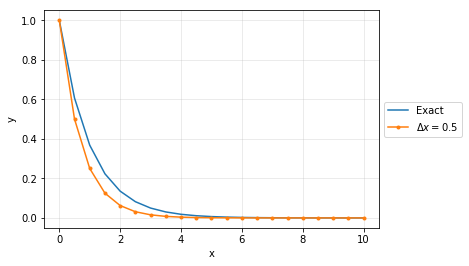

In [69]:
plt.plot(x,yexact(x))
plt.plot(x,y, marker='.')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
labels = ['Exact', '$\Delta x=0.5$']
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

Not a bad result!

<br>
<div class="alert alert-block alert-info">
**Problem 6:**
<br>
Now, go back to the beginning of the example, and change the grid spacing to the following values:
<ul>
<li> $\Delta x = 0.9$ </li>
<li>  $\Delta x = 1$</li> 
<li> $\Delta x = 1.4$</li> 
</ul>
What do you notice happens to our numerical solution?
</div>

To analyse what's actually happening here, let's consider the ratio $y_{n+1}/y_n$:

\begin{align*}
		y_{n+1} = y_n -ky_n\Delta x = y_n(1-k\Delta x) ~~~ \Rightarrow~~~ \frac{y_{n+1}}{y_n} =1-k\Delta x
\end{align*}
    
This allows us to solve the recursion relation to find $y_n$ in terms of $n$:

\begin{align*}
    y_{n} = \frac{y_{n}}{y_{n-1}}\frac{y_{n-1}}{y_{n-2}}\cdots \frac{y_1}{y_0}y_0 = y_0(1-k\Delta x)^n
\end{align*}

Now, we know from $\lim_{x\rightarrow\infty}e^{-kx}=0$ that the behaviour of the solution should tend towards 0 as $x$ increases. Since $\lim_{n\rightarrow\infty}a^n=0$ if and only if $|a|<1$, we require

\begin{align*}
    |1-k\Delta x|<1 ~~~ \Rightarrow ~~~ \Delta x < \frac{2}{k}
\end{align*}

to ensure that the numerical solution remains stable as $n$ increases. Otherwise, if $\Delta x > 2/k$, we will find that as $n$ increases, the numerical solution oscillates and grows, with $y_n\rightarrow\infty$ as $n\rightarrow\infty$.


----

<div class="bs-callout bs-callout-warning">

<h4>Aside: Stability derivation</h4>
<br>
Let's consider the stability in a slightly more rigorous fashion. Say we want to solve the general initial value problem $y'(x)=f(y(x),x)$ with initial condition $y(0)=y_0$. Using the forward Euler method,
<br>
\begin{align}
	y_{n+1} = y_n +\Delta x f(y_n,x_n)
\end{align}
<br>
However, now lets assume there is some small numerical error present in the estimation of $y_n$; this can be represented as $\delta y_n$:
<br><br>
\begin{align}
	(y_n + \delta y_n) + \Delta x f(y_n+\delta y_n,x_n)
\end{align}
<br>
Since $\delta y<<1$, we can neglect terms of order $\delta y^2$ or higher; thus, doing the first order Taylor expansion of $f$ around $\delta y_n$,
<br><br>
\begin{align}
	&\Rightarrow~~y_n + \delta y_n + \Delta x \left[f(y_n,x_n)+\delta y_n \frac{\partial}{\partial y_n}f(y_n,x_n) + \mathcal{O}(\delta y^2)\right]\\[7pt]
	&\Rightarrow~~ (y_n + \Delta x f(y_n,x_n)) + \left( 1 + \Delta x\frac{\partial f}{\partial y_n} \right)\delta y_n
\end{align}
<br>
The first bracketed term we recognise as simply the forward Euler method applied to point $y_n$. Thus we can deduce that the second term represents the numerical error present in $y_{n+1}$ **due to** the presence of $\delta y_n$:
<br><br>
\begin{align}
	\delta y_{n+1} =  \left( 1 + \Delta x\frac{\partial f}{\partial y_n} \right)\delta y_n
\end{align}
<br>
It is easy to see now that the forward Euler method is only stable (i.e. the numerical error of successive steps does not grow unconditionally) if
<br><br>
\begin{align}
	 \left| 1 + \Delta x\frac{\partial f}{\partial y} \right| \leq 1
\end{align}
<br>
Solving this for a potentially complex function $f(y,x)$, and using the notation $f_y\equiv\partial f/\partial y$,
<br><br>
\begin{align}
	0< \Delta x \leq - \frac{2\text{Re}(f_y)}{|f_y|^2}
\end{align}
<br>

</div>

A couple of things to note:

* If $\text{Re}(f_y)<0$:
  * The system is **conditionally stable** -- there exists some $\Delta x$ that satisfies $\Delta x \leq - 2\text{Re}(f_y)/|f_y|^2$|
  
  
* If $\text{Re}(f_y)\geq 0$:
  * The system is **unconditionally unstable** -- the right hand side is always less than zero and there is *no* value of $\Delta x$ which satisfies it. This includes *oscillating* ODEs, with ODE given by $y'(x) = \pm i\omega y(x)$|

So this looks all well and good, right? Just make sure that we the ODE is conditionally stable, and we should be good!

Not quite.

From the equation for conditional stability, if $\text{Im}(f_y)$ is large, then the value of $\Delta x$ required for stability will be exceedingly small, requiring an increase in computation time.

And what happens if the ODE is unconditionally unstable? We'll have to ditch the first order forward Euler method altogether, and choose a method that ends up being stable!

# The leap-frog method

Rather than use the first-order Euler finite difference formulas, let's instead solve a first order ODE using the central difference formula:

\begin{align}
	y'(x) = f(y(x),x) &~~~\Rightarrow~~~ \frac{y(x+h)-y(x-h)}{2h} \approx f(y(x),x)\\[5pt]
	&~~~\Rightarrow~~~ y(x+h) \approx y(x-h) + 2hf(y(x),x)
\end{align}

Or, in discrete form,

\begin{align}
	\boxed{y_{n+1}\approx y_{n-1}+2\Delta x f(y_n,x_n) }
\end{align}

This is the **leap-frog** algorithm.

<br>
<div class="alert alert-success">
**Note:**
<br>
In order to use the leap-frog method, two initial conditions are required, $y_0$ and $y_1$.
<br><br>
$y_0$ is always given in initial value problems, whilst $y_1$ can be calculated via one iteration of the forward Euler method.
</div>

## Numerical error

Subtracting the leap-frog formula from the Taylor series of $y(x+h)$,

\begin{align*}
	y(x+h) - y_{LF}(x+h)&= \left[ y(x) + hy'(x) + \frac{1}{2}h^2y''(x) + \mathcal{O}(h^3) \right]- [y(x-h) + 2hy'(x)]\\[5pt]
	&= \left[y(x) -hy'(x) + \frac{1}{2}h^2y''(x) + \mathcal{O}(h^3)\right] -y(x-h)
\end{align*}

and substituting in the Taylor series of $y(x-h)$,

\begin{align*}
	y(x-h) = y(x) - hy'(x) + \frac{1}{2}h^2y''(x) + \mathcal{O}(h^3) 
\end{align*}

we find that all terms of order $h^2$ and less cancel out, leaving

\begin{align}
	y(x+h) - &y_{LF}(x+h) = \mathcal{O}(h^3)
\end{align}

Therefore the leap-frog method has a step truncation error bounded by $h^3$. Calculating the global error after $n$ time steps,

\begin{align*}
	n\times\text{step error} = \frac{1}{h}(x_{n-1}-x_0)\times\mathcal{O}(h^3) = \mathcal{O}(h^2)
\end{align*}

so the leap-frog method is accurate to **second-order**.

---

<div class="alert alert-info">
**Problem 7:**
<br>
The decay equation models the decay of excited atoms with the first order ODE

$$N'(t)=-\frac{1}{\tau}N(t)$$

Let $N(0)=100$, and $\tau=5$.
<br><br>
The exact solution to the ODE is given by:
</div>

In [125]:
def Nexact(t):
    return 100*np.exp(-0.2*t)

<div class="alert alert-info">
Below, I have provided a Python list containing values of $\Delta t$ from $10^{-6}$ to $10^1$, with each element increasing by an order of 10:
</div>

In [126]:
dtvals = [10**i for i in range(-6,1)]

<div class="alert alert-info">
a) Solve the ODE using the forward Euler equation, for each of the $\Delta t$ in the Python list, over the domain $0\leq t\leq 5$.
<br><br>
Do *not* store the intermediate values, just the final value at $t=5$! Use this value to calculate the resulting global error from the forward Euler method at point $t=5$:
<br><br>
$$ \text{err}(\Delta t) = \left|\frac{N_{euler}(5) - N_{exact}(5)}{N_{exact}(5)}\right|$$
<br><br>
You should end up with a list containing the pairs $(\Delta t, \text{err}(\Delta t)$.
</div>

In [128]:
# use a For loop to find the forward euler error
FEerr = []
for dt in dtvals:
    # insert forward Euler method here
    
    error = np.abs( (eulerRes - yexact(5)) / yexact(5) )
    
    FEerr.append(error)

<div class="alert alert-info">
b) Repeat part (a), this time using the leap-frog method. Remember, the leap-frog method requires initial values at points $N(0)$ and $N(\Delta t)$ - you can use the forward euler method to get the second initial condition:
<br><br>
$$N(\Delta t) \approx N(0)+\Delta t\times N'(t)$$
</div>

In [129]:
# use a For loop to find the leap frog error
LFerr = []
for dt in dtvals:
    # insert initial condition calculations here
    
    # insert leap-frog method here
    
    error = np.abs( (leapfrogRes - yexact(5)) / yexact(5) )
    
    LFerr.append(error)

<div class="alert alert-info">
c) Using the plotting code provided below, plot $\Delta t$ vs. the error for both the forward Euler and the Leap frog method.
</div>

In [ ]:
# plot dt vs. forward Euler method on a log-log plot
plt.loglog(dt,FEerr, marker='.')

# plot dt vs. leap-frog method on a log-log plot
plt.loglog(dt,LFerr, marker='.')

plt.xlabel('dt')
plt.ylabel('Error')
plt.grid(alpha=0.3)
labels = ['Forward Euler', 'Leap-frog']
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

<div class="alert alert-info">
d) What do you notice about the gradients of both plots? How does this relate to the global errors of the Forward Euler and Leap-frog methods?
</div>

---
<br>
<div class="alert alert-block alert-success">
**Note:**
Even though we won't go into more detail here, it turns out the leap-frog method is only conditionally stable for **oscillating** ODEs - so, if we were to increase the time beyond 25 seconds in the above atomic decay example, we might have seen instability!
</div>

# NumPy Shortcuts

In this notebook, we have derived from first-principles the method of finite differences, and how we can use it to solve ODEs. This has allowed us to analyse error and stability from a mathematical standpoint.

Furthermore, nothing so far has been Python-exclusive - all these techniques can be easily translated to other programming languages, such as C, Fortran, Matlab, Java, and Mathematica.

However, NumPy conveniently provides us with a function that automatically applies numerical differentiation techniques, a useful tool when you want to focus on the system to be analysed, and don't want to worry about the finer points of implementing the centered finite difference approximation!

This functions is [`numpy.gradient`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.gradient.html), and you can read more about it via its documentation. Of note: `numpy.gradient` uses the central finite difference approximation, which we covered at the very beginning.

Let's consider a simple function, and find the derivative using the `numpy.gradient` function.

---
<div class="alert alert-warning">
**Example:**
<br>
Numerically calculate the derivative of $f(x) = \sin(x)$, over $0\leq x\leq 2\pi$.
</div>

In [141]:
dx = 0.05
x = np.arange(0,2*np.pi+dx,dx)
f = np.sin(x)

In [142]:
df = np.gradient(f,x)

Plotting this result, we can verify that NumPy has returned the derivative of our function $f(x)$.

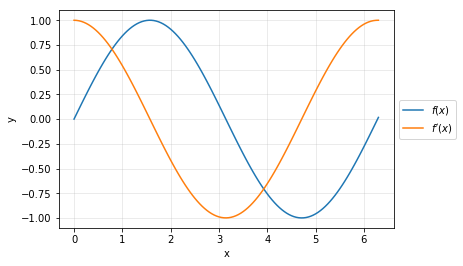

In [143]:
plt.plot(x,f)
plt.plot(x,df)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=0.3)
labels = ['$f(x)$', "$f'(x)$"]
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))